# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Reading dataset

In [3]:
df = pd.read_csv('train_quora.csv')

In [4]:
df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


# Checking for binary/non-binary class and balanced/non-balanced dataset

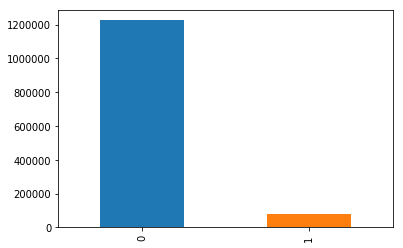

In [5]:
df['target'].value_counts().plot(kind = 'bar')

In [6]:
df['target'].value_counts()/len(df) *100

0    93.812982
1     6.187018
Name: target, dtype: float64

In [7]:
#It's a binary classed dataset & is majorly imbalanced!

# Performing Text Cleaning

In [8]:
#(1.) converting into lower case characters

In [9]:
clean1 = df['question_text'].str.lower()

In [15]:
clean1.head()

0    how did quebec nationalists see their province...
1    do you have an adopted dog, how would you enco...
2    why does velocity affect time? does velocity a...
3    how did otto von guericke used the magdeburg h...
4    can i convert montra helicon d to a mountain b...
Name: question_text, dtype: object

In [10]:
#(2.) Removal of removal expressions

In [12]:
clean2 = clean1.str.replace('[^a-z]',' ')

In [13]:
clean2.head()

0    how did quebec nationalists see their province...
1    do you have an adopted dog  how would you enco...
2    why does velocity affect time  does velocity a...
3    how did otto von guericke used the magdeburg h...
4    can i convert montra helicon d to a mountain b...
Name: question_text, dtype: object

In [14]:
#(3.) Removal of stopwords & (4.) Performing Stemming

In [15]:
import nltk

In [16]:
stopword = nltk.corpus.stopwords.words('English')

In [17]:
def clean_sen(text):
    stemmer = nltk.stem.PorterStemmer()
    words = text.split(' ')
    words_clean = [stemmer.stem(word) for word in words if word not in stopword]
    return ' '.join(words_clean)

In [18]:
clean3 = clean2.apply(clean_sen)

In [19]:
clean3.head()

0          quebec nationalist see provinc nation     
1         adopt dog  would encourag peopl adopt shop 
2     veloc affect time  veloc affect space geometri 
3           otto von guerick use magdeburg hemispher 
4    convert montra helicon mountain bike chang tyre 
Name: question_text, dtype: object

# Creating Document - Term Matrix

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
vectorizer = CountVectorizer(min_df = 50)

In [29]:
train,test = train_test_split(clean3,test_size = 0.3,random_state = 123)

In [30]:
vectorizer.fit(train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=50,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [31]:
train_dtm = vectorizer.transform(train)

In [32]:
test_dtm = vectorizer.transform(test)

In [33]:
#to visulaize first five records in train_dtm

In [35]:
pd.DataFrame(train_dtm[:5].toarray(),columns = vectorizer.get_feature_names())

,aa,aadhaar,aadhar,aakash,aap,aaron,ab,abandon,abbrevi,abc,...,zinc,zionist,zip,zodiac,zombi,zone,zoo,zoolog,zoom,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Splitting into train & test input

In [36]:
train_x = train_dtm

In [37]:
train_y = df.iloc[train.index]['target']

In [38]:
test_x = test_dtm

In [39]:
test_y = df.iloc[test.index]['target']

# Building models

Building decission tree model:

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
model1 = DecisionTreeClassifier(max_depth = 10)

In [44]:
model1.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Building random forest model:

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
model2 = RandomForestClassifier()

In [52]:
model2.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Predicting

Predicting on decission tree model:

In [46]:
m1_pred = model1.predict(test_x)

In [47]:
#since it's unbalanced dataset we cannot use accuracy as an evaluation metric 

In [48]:
from sklearn.metrics import classification_report,f1_score

In [49]:
print(f1_score(test_y,m1_pred))

0.3013277252895571


Predicting on random forest model:

In [53]:
m2_pred = model2.predict(test_x)

In [54]:
print(f1_score(test_y,m2_pred))

0.3916390433662986


#Since f1_Score of random forest is more than that of decision tree...accepting random forest for final model!